## Exploring Large Languange Models(LLM) and their Foundation

In [19]:
# Import libraries 
from transformers import AutoModel
from transformers import AutoTokenizer
from transformers import AutoModel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import torch

In [5]:
# Load a pre-trained tokenizer 
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example text (response from assignment on explaining how prompt engineering could streamline daily task)
text = "Prompt Engineering is a way LLM models generate text based on specified instructions. " \
"For instance, if one wants to generate cooking recipe, the user can input ingredient names and " \
"prompt the model to generate three recipes based on those three ingredients. Therefore, prompt engineering can be used to " \
"simplify daily tasks such as writing emails, generating reports and brainstorming. " \
"For instance, brainstorming can be simplified using LLM models. Therefore, to streamline the process, I will input a prompt that " \
"specifies the topic and prompt the model to generate a list of ideas pertaining to that topic. " \
"Based on the results generated, I will refine the results to be as specific as possible."

# Tokenize example text
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Print tokens and IDs
print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['prompt', 'engineering', 'is', 'a', 'way', 'll', '##m', 'models', 'generate', 'text', 'based', 'on', 'specified', 'instructions', '.', 'for', 'instance', ',', 'if', 'one', 'wants', 'to', 'generate', 'cooking', 'recipe', ',', 'the', 'user', 'can', 'input', 'ingredient', 'names', 'and', 'prompt', 'the', 'model', 'to', 'generate', 'three', 'recipes', 'based', 'on', 'those', 'three', 'ingredients', '.', 'therefore', ',', 'prompt', 'engineering', 'can', 'be', 'used', 'to', 'sim', '##plify', 'daily', 'tasks', 'such', 'as', 'writing', 'emails', ',', 'generating', 'reports', 'and', 'brains', '##torm', '##ing', '.', 'for', 'instance', ',', 'brains', '##torm', '##ing', 'can', 'be', 'simplified', 'using', 'll', '##m', 'models', '.', 'therefore', ',', 'to', 'stream', '##line', 'the', 'process', ',', 'i', 'will', 'input', 'a', 'prompt', 'that', 'specifies', 'the', 'topic', 'and', 'prompt', 'the', 'model', 'to', 'generate', 'a', 'list', 'of', 'ideas', 'pertaining', 'to', 'that', 'topic', '.

In [6]:
# Total number of tokens 
print("Number of tokens:", len(tokens))

# Subwords present in text
subwords = [token for token in tokens if "##" in token]
print("Subwords:", subwords)

Number of tokens: 135
Subwords: ['##m', '##plify', '##torm', '##ing', '##torm', '##ing', '##m', '##line', '##ine']


####  Number of tokens - 135
#### Sub-words splits  - LLM(##m); Simplify (##plify); brainstorm (##torm); Engineering(##ing); Streamline(##line)

In [7]:
# Load BERT model
model = AutoModel.from_pretrained("bert-base-uncased")

# Convert tokens to tensor
input_ids = torch.tensor([token_ids])

# Extract embeddings
with torch.no_grad():
    outputs = model(input_ids)

# Get the last hidden state
embeddings = outputs.last_hidden_state.squeeze(0)

print("Embedding shape:", embeddings.shape)  # (num_tokens, embedding_dim)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Embedding shape: torch.Size([135, 768])


#### Embedding shape - (135, 768)

#### Visualize Embedding using PCA 

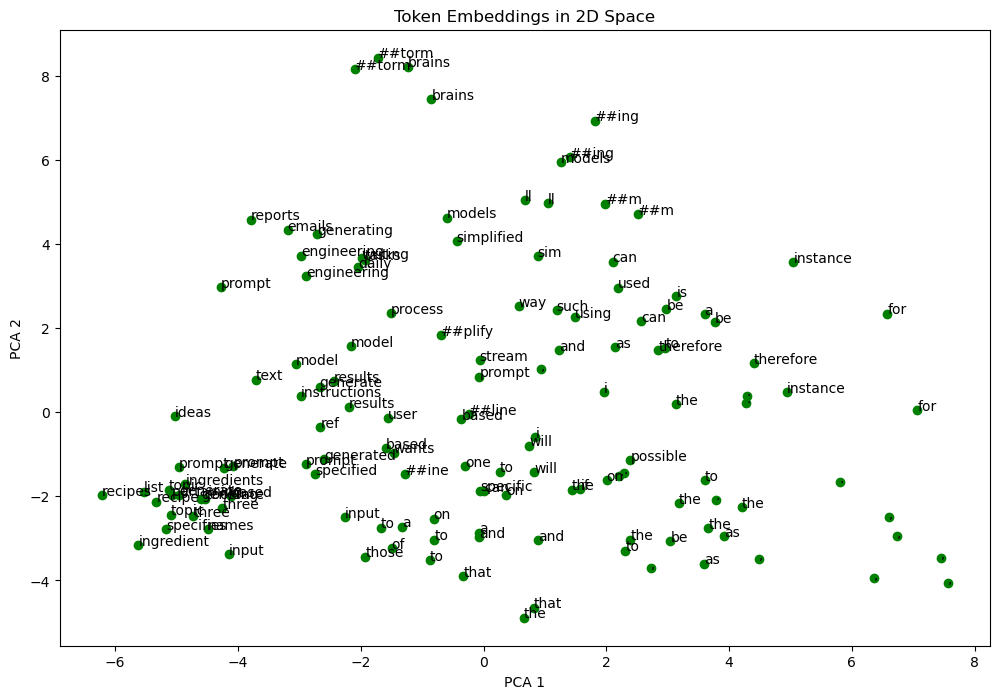

In [17]:
# Visualize Embedding generated from BERT model

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.numpy())

# Plot the embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color = 'green')

# Annotate each point with its token
for i, token in enumerate(tokens):
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Token Embeddings in 2D Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Project 3- Build a mini application

#### Goal is to develop an AI-task manager that takes input from a user and prioritizes the input based on ranking. This is an advanced project using the user story on task management from Introduction to Python module

##### Since this is a simple Task, Streamlit runs on webpage inside Jupyter notebook. 

In [20]:
# import libraries
import streamlit as st
from transformers import AutoTokenizer, AutoModel
import torch
from datetime import datetime

In [26]:
# Load pre-trained tokenizer & model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Function to get embeddings from text (using BERT)
def get_embedding(text):
    tokens = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

# Streamlit UI (inside Jupyter notebook)
st.title("AI Task Manager")
st.write("Enter your tasks, and the AI will prioritize them based on deadlines and importance.")

# Store tasks
tasks = [] # stores user entry

# Input fields
task = st.text_input("Task Description") #define task
deadline = st.date_input("Deadline") # enter deadline
priority = st.selectbox("Priority", ["High", "Medium", "Low"]) # select priority

# Add task button
if st.button("Add Task"):
    if task and deadline and priority:
        # Create a new task entry
        embedding = get_embedding(task)
        tasks.append({"task": task, "deadline": deadline, "priority": priority, "embedding": embedding})
        
        # Display a confirmation message
        st.write(f"✅ Task '{task}' added successfully!") #display message for correct entry
    else:
        st.write("❌ Please fill in all fields!") # error message if 1 or more field is empty

# Function to sort tasks based on priority and deadline
def sort_tasks(tasks):
    priority_map = {"High": 3, "Medium": 2, "Low": 1}
    return sorted(tasks, key=lambda x: (priority_map[x["priority"]], x["deadline"]), reverse=True) # sort task based on ranking

# Displaying sorted tasks
if tasks:
    sorted_tasks = sort_tasks(tasks)
    st.subheader("Prioritized Task List:")
    for t in sorted_tasks:
        st.write(f"📌 **{t['task']}** | ⏳ Due: {t['deadline']} | 🔥 Priority: {t['priority']}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Run Streamlit application on web browser
!streamlit run task_manager.py

^C
